# Fraudulent Activities

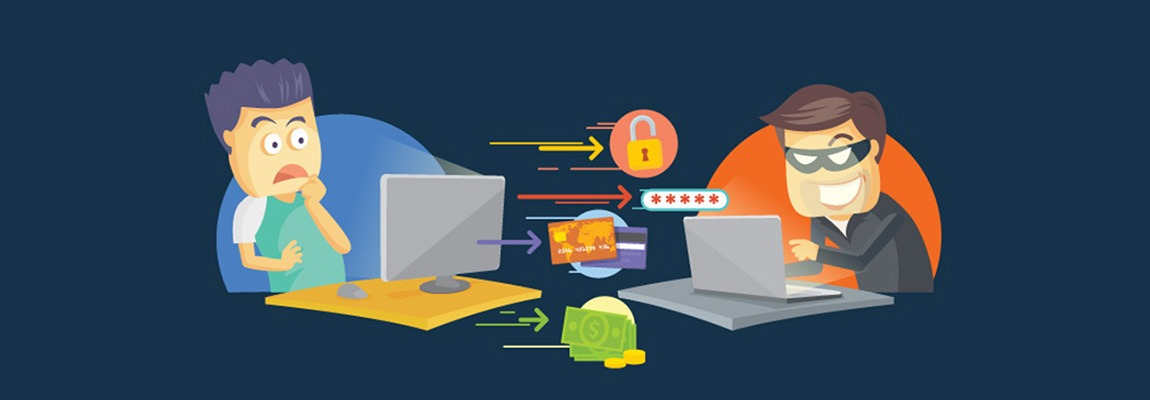 

## OBJECTIVE

E-commerce sites move a lot of money around. This can lead to significant risks of fraudulent activities, such as the use of stolen credit cards, money laundering, etc.

Fortunately, the Machine Learning can help us to identify these fraudulent activities. All the websites where you have to enter your payment information have a team that deals with managing the risk of fraud via ML.

The goal of this challenge is to build a model that allows you to predict the probability of fraudulent transactions.

## DESCRIPTION

Company X does E-commerce and sells handmade clothing. Your goal is to build a model to predict whether the purchase of a piece of clothing should be considered a fraudulent transaction or not.

Here is precisely what you need to do:

1. For each user, determine the country of origin from his or her IP address.

2. Build a model that predicts whether the activity is fraudulent or not. Also explain your choices/assumptions in terms of false positive and false negative optimization.

3. Your boss would like to understand your model because he is worried about using a _black box_ model. How would you explain it from a user point of view, not a mathematical one. For example, which users can be classified as _risky_?

4. Suppose you can use your model live to make its prediction in real time. From a product point of view, how would you use it? How would you think about the user experience with this product?


## DATA

You can use the following two tables:


Fraud_Data<br/>
&<br/>
IpAddress_to_Country

## Table of Contents <a class="anchor" id="0"></a>

I.   [Exploratory data analysis and visualisation](#1)<br/>

   1.  [Data visualisation Map](#1a) <br/>
   2.  [Data time](#1b)<br/>
   3.  [Data ip_count](#1c)<br/>
   4.  [Data Matrice de confusion](#1d)<br/>
  
II.  [Time to do Machine Learning](#2)<br/>

   1.  [Logistic Regression](#2a) <br/>
   2.  [Logistic Regression + Gridsearch](#2b)<br/>
   3.  [Random Forest](#2c)<br/>
   4.  [Random Forest + Gridsearch](#2d)<br/>
   5.  [Addaboost and XGboost](#2e)<br/>

III. [Staking and Voting](#3)<br/>

   1.  [Voting](#3a) <br/>
   2.  [Staking](#3b)<br/>

IV.  [Bonus : PCA SMOTETomek](#4) <br/>

V.   [Evaluation Report](#5) <br/>
  

# Exploratory data analysis and visualisation <a class="anchor" id="1"></a>
[return to contents](#0)

In [1]:
# standard
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing data
Fraud_Data = pd.read_csv("Datasets/Fraud_Data.csv")
IpAddress = pd.read_csv("Datasets/IpAddress_to_Country.csv")

In [3]:
# returns the first 10 rows
Fraud_Data.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [4]:
# returns the first 10 rows
IpAddress.head(10)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China
5,16781312.0,16785407,Japan
6,16785408.0,16793599,China
7,16793600.0,16809983,Japan
8,16809984.0,16842751,Thailand
9,16842752.0,16843007,China


In [5]:
k=[]
for i in range(len(Fraud_Data['ip_address'])):
    ip=Fraud_Data['ip_address'][i]
    tmp=IpAddress[(IpAddress['lower_bound_ip_address']<=ip) & (IpAddress['upper_bound_ip_address']>=ip)]['country'].tolist()
    k.extend(tmp if tmp else ['Others'])   

In [6]:
Fraud_Data['country']=k

In [7]:
Fraud_Data.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Others
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,Others
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,United States


In [8]:
Fraud_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
 11  country         151112 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 13.8+ MB


In [9]:
Fraud_Data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [10]:
Fraud_Data['country'].value_counts()

United States                     58049
Others                            21966
China                             12038
Japan                              7306
United Kingdom                     4490
                                  ...  
Tajikistan                            1
British Indian Ocean Territory        1
Nauru                                 1
Cape Verde                            1
Turkmenistan                          1
Name: country, Length: 182, dtype: int64

In [11]:
# Print the ratio of fraud cases
ratio_cases = (Fraud_Data['class'].value_counts()/Fraud_Data['class'].value_counts().sum()).round(3)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.094
Ratio of non-fraudulent cases: 0.906


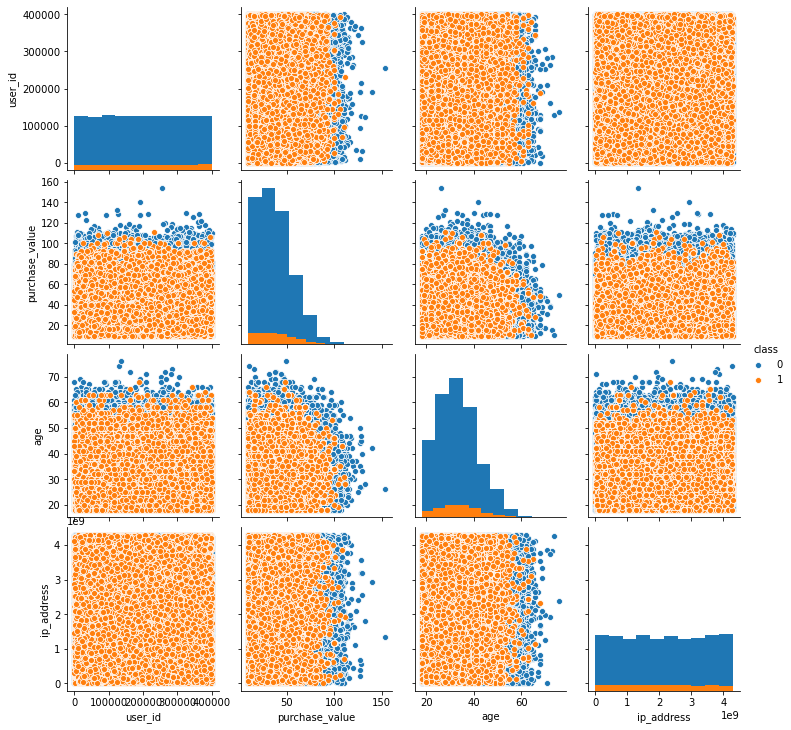

In [12]:
sns.pairplot(Fraud_Data, dropna=True, hue='class', diag_kind='hist')

In [13]:
Fraud_Data['country'].isnull().value_counts()/Fraud_Data['country'].isnull().value_counts().sum()

False    1.0
Name: country, dtype: float64

## Data Visualisation MAP <a class="anchor" id="1a"></a>
[return to contents](#0)

In [13]:
import geopandas as gpd
shapefile = 'Datasets/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf1= gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf1.columns = ['country', 'country_code', 'geometry']
gdf.shape

(177, 3)

In [14]:
Fraud_Data_map= Fraud_Data[['country','class']]
Fraud_Data_map.dropna(how='all')

,country,class
0,Japan,0
1,United States,0
2,United States,1
3,Others,0
4,United States,0
...,...,...
151107,United States,1
151108,Netherlands,0
151109,Japan,0
151110,United States,0


In [15]:
Fraud_Data_map[(Fraud_Data_map['class']==1) |(Fraud_Data_map['class']==0)].groupby('country').size().sum()

151112

In [16]:
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="United States", value="United States of America")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Viet Nam", value="Vietnam")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Korea Republic of", value="South Korea")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Russian Federation", value="Russia")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Moldova Republic of", value="Moldova")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Croatia (LOCAL Name: Hrvatska)", value="Croatia")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Bahamas", value="The Bahamas")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Tanzania United Republic of", value="United Republic of Tanzania")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Taiwan; Republic of China (ROC)", value="Taiwan")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Congo", value="Republic of the Congo")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Congo The Democratic Republic of The", value="Democratic Republic of the Congo")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Slovakia (SLOVAK Republic)", value="Slovakia")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Lao People's Democratic Republic", value="Laos")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Syrian Arab Republic", value="Syria")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Serbia", value="Republic of Serbia")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Libyan Arab Jamahiriya", value="Libya")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Iran (ISLAMIC Republic Of)", value="Iran")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Cote D'ivoire", value="Ivory Coast")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Bosnia and Herzegowina", value="Bosnia and Herzegovina")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Czech Republic", value="Czechia")


In [17]:
Fraud_Data_map11=Fraud_Data_map[Fraud_Data_map['class']==1].groupby('country').size()/(Fraud_Data_map[(Fraud_Data_map['class']==1)].groupby('country').size().sum())*100
Fraud_Data_map11 = pd.DataFrame(Fraud_Data_map11)
Fraud_Data_map11.sort_values(0, ascending=False).head(20)

,0
country,
United States of America,39.226910
Others,13.306480
China,7.370504
Japan,5.052646
United Kingdom,3.370787
South Korea,2.685323
Canada,2.459190
France,2.119992
Brazil,1.907992


In [18]:
Fraud_Data_map1=Fraud_Data_map.dropna(how='all').groupby("country")
Fraud_Data_map1=pd.DataFrame(Fraud_Data_map1)
Fraud_Data_map1.shape

(182, 2)

In [19]:
# Identify what values are in TableB and not in TableA
key_diff = set(Fraud_Data_map1[0]).difference(gdf['country'])
where_diff = Fraud_Data_map1[0].isin(key_diff)

Fraud_Data_map1['where_diff']=where_diff

In [20]:
Fraud_Data_map1[0][Fraud_Data_map1['where_diff']==True].reset_index(drop=True)

0                Antigua and Barbuda
1                            Bahrain
2                           Barbados
3                            Bermuda
4      Bonaire; Sint Eustatius; Saba
5     British Indian Ocean Territory
6                  Brunei Darussalam
7                         Cape Verde
8                     Cayman Islands
9                            Curacao
10                          Dominica
11                    European Union
12                     Faroe Islands
13                         Gibraltar
14                        Guadeloupe
15                              Guam
16                         Hong Kong
17                     Liechtenstein
18                             Macau
19                          Maldives
20                             Malta
21                         Mauritius
22                            Monaco
23                             Nauru
24                            Others
25    Palestinian Territory Occupied
26                           Reunion
2

In [21]:
# Identify what values are in TableB and not in TableA
key_diff = set(gdf1['country']).difference(Fraud_Data_map1[0])
where_diff = gdf1['country'].isin(key_diff)

gdf1['where_diff']=where_diff

In [22]:
gdf1['country'][gdf1['where_diff']==True].reset_index(drop=True)

0                          Western Sahara
1                                 Somalia
2                                    Chad
3                        Falkland Islands
4                               Greenland
5     French Southern and Antarctic Lands
6                              East Timor
7                                  Guyana
8                                Suriname
9                                    Mali
10                             Mauritania
11                                   Togo
12                                 Guinea
13                          Guinea-Bissau
14                                Liberia
15                           Sierra Leone
16               Central African Republic
17                      Equatorial Guinea
18                               eSwatini
19                              Palestine
20                            North Korea
21                        Solomon Islands
22                                 Brunei
23                                

In [23]:
#Merge dataframes gdf and Fraud_Data.
merged = gdf.merge(Fraud_Data_map, left_on = 'country', right_on = 'country',  how = 'left')

Data=[]
Data= pd.DataFrame(Data)

Data['Percent_of_Fraud']=merged.groupby(by="country").mean()["class"]
#Data['Percent_of_Fraud']= merged[merged['class']==1].groupby('country').size()/(merged[(merged['class']==1)].groupby('country').size().sum())*100
Data = pd.DataFrame(Data)
Data['Percent_of_Fraud']=Data['Percent_of_Fraud']*100

#Merge dataframes gdf and Data.
merged = gdf.merge(Data, left_on = 'country', right_on = 'country',  how = 'left')
merged.sort_values("Percent_of_Fraud", ascending = False)

,country,country_code,geometry,Percent_of_Fraud
106,Turkmenistan,TKM,"POLYGON ((52.50246 41.78332, 52.94429 42.11603...",100.000000
50,Namibia,NAM,"POLYGON ((19.89577 -24.76779, 19.89473 -28.461...",43.478261
138,Sri Lanka,LKA,"POLYGON ((81.78796 7.52306, 81.63732 6.48178, ...",41.935484
128,Luxembourg,LUX,"POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...",38.888889
44,Ecuador,ECU,"POLYGON ((-75.37322 -0.15203, -75.23372 -0.911...",26.415094
...,...,...,...,...
154,Eritrea,ERI,"POLYGON ((36.42951 14.42211, 36.32322 14.82249...",NaN
159,Antarctica,ATA,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",NaN
160,Northern Cyprus,CYN,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",NaN
167,Somaliland,SOL,"POLYGON ((48.94820 11.41062, 48.94820 11.41062...",NaN


In [24]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [25]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import *
import colorcet as cc

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = cc.kr
#kbc en bleu
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 20, nan_color = '#d9d9d9')
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal')
#Create figure object.
p = figure(title = 'Percent of fraudulent activities', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Percent_of_Fraud', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...

In [26]:
merged['Percent_of_Fraud'] = merged['Percent_of_Fraud'].round(2)

In [27]:
merged.drop(columns=['country_code','geometry']).sort_values('Percent_of_Fraud', ascending=False).head(50).reset_index(drop=True)

,country,Percent_of_Fraud
0,Turkmenistan,100.00
1,Namibia,43.48
2,Sri Lanka,41.94
3,Luxembourg,38.89
4,Ecuador,26.42
5,Tunisia,26.27
6,Peru,26.05
7,Bolivia,24.53
8,Kuwait,23.33
9,Ireland,22.92


In [28]:
Fraud_Data['country'].isnull().value_counts()

False    151112
Name: country, dtype: int64

In [29]:
ZOULOU= Fraud_Data.groupby(by="country").mean()["class"].sort_values(ascending = False).reset_index()

In [30]:
ZOULOU.head(30)

,country,class
0,Turkmenistan,1.000000
1,Namibia,0.434783
2,Sri Lanka,0.419355
3,Luxembourg,0.388889
4,Virgin Islands (U.S.),0.333333
5,Ecuador,0.264151
6,Tunisia,0.262712
7,Peru,0.260504
8,Bolivia,0.245283
9,Kuwait,0.233333


In [31]:
Count_country = pd.DataFrame(Fraud_Data.groupby(by="country").sum()["class"].sort_values(ascending = False).reset_index())

C=[]
for i in range(len(Fraud_Data['country'])):
    country=Fraud_Data['country'][i]
    coun=Count_country[(Count_country['country']==country)]['class'].tolist()
    C.extend(coun if coun else ['Others'])   

In [32]:
Fraud_Data['Country_count']=C

# Data Time <a class="anchor" id="1b"></a>
[return to contents](#0)

In [7]:
from datetime import time
# returns the first 10 rows
Fraud_Data.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Others
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,Others
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,United States


In [8]:
from datetime import datetime
s = "2015-02-24 22:55:49"
y = "2015-04-18 02:47:11"
f = "%Y-%m-%d %H:%M:%S"
out = datetime.strptime(s, f)
out1 = datetime.strptime(y, f)
d=out1-out
print(d)
# Converting a to string in the desired format (YYYYMMDD) using strftime
# and then to int.
d.total_seconds()/60/60/24

52 days, 3:51:22


52.1606712962963

In [9]:
a=[]
b=[]

for i in range(len(Fraud_Data['signup_time'])):
    a.append(datetime.strptime(Fraud_Data['signup_time'][i], "%Y-%m-%d %H:%M:%S"))
    b.append(datetime.strptime(Fraud_Data['purchase_time'][i], "%Y-%m-%d %H:%M:%S"))

In [10]:
c=np.array(b)-np.array(a)
Fraud_Data['time']=c

In [11]:
u=[]
for i in range(len(Fraud_Data['time'])):
    u.append(Fraud_Data['time'][i].total_seconds()/60/60/24)

In [12]:
Fraud_Data['time']=u

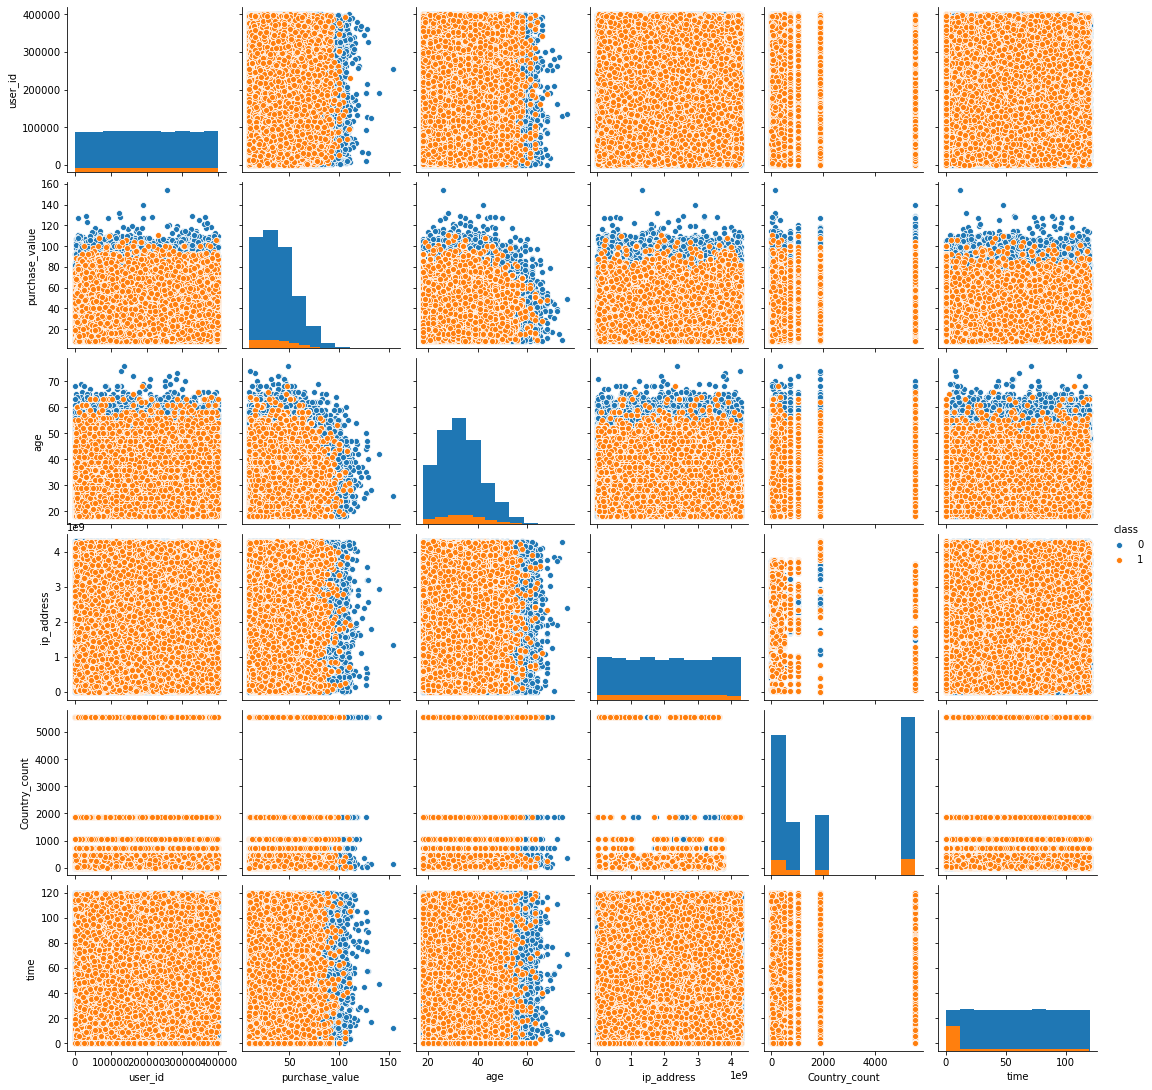

In [40]:
#graphique 
sns.pairplot(Fraud_Data, dropna=True, hue='class', diag_kind='hist')

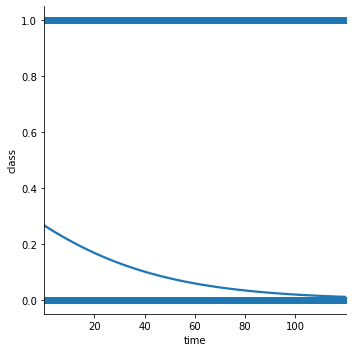

In [41]:
sns.lmplot(x="time", y="class", data= Fraud_Data, logistic = True)

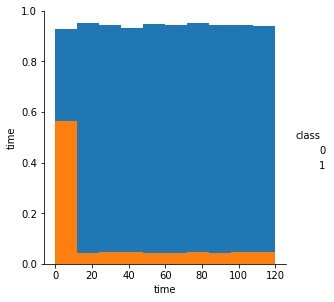

In [42]:
g = sns.PairGrid(Fraud_Data[["class","time"]], hue="class",height=4)
g = g.map_diag(plt.hist)
g = g.add_legend()

## Data ip_count <a class="anchor" id="1c"></a>
[return to contents](#0)

In [33]:
print(Fraud_Data.device_id)
ip_count = Fraud_Data.groupby('ip_address')['user_id'].count()


0         QVPSPJUOCKZAR
1         EOGFQPIZPYXFZ
2         YSSKYOSJHPPLJ
3         ATGTXKYKUDUQN
4         NAUITBZFJKHWW
              ...      
151107    XPSKTWGPWINLR
151108    LYSFABUCPCGBA
151109    MEQHCSJUBRBFE
151110    CMCXFGRHYSTVJ
151111    ZINIADFCLHYPG
Name: device_id, Length: 151112, dtype: object


In [34]:
df = pd.DataFrame(ip_count.sort_values(ascending=False).reset_index())

In [35]:
df.iloc[0,0]

1502818419.73176

In [36]:
Fraud_Data[Fraud_Data.ip_address == 1502818419.73176]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time,Country_count
9679,101698,2015-01-06 06:33:21,2015-01-06 06:33:22,47,ZUSVMDEZRBDTX,Ads,Safari,M,55,1.502818e+09,1,Saudi Arabia,0.000012,50
22782,344459,2015-01-06 06:33:23,2015-01-06 06:33:24,47,ZUSVMDEZRBDTX,Ads,Safari,M,55,1.502818e+09,1,Saudi Arabia,0.000012,50
27520,129583,2015-01-06 06:33:22,2015-01-06 06:33:23,47,ZUSVMDEZRBDTX,Ads,Safari,M,55,1.502818e+09,1,Saudi Arabia,0.000012,50
33712,155117,2015-01-06 06:33:24,2015-01-06 06:33:25,47,ZUSVMDEZRBDTX,Ads,Safari,M,55,1.502818e+09,1,Saudi Arabia,0.000012,50
43697,249911,2015-01-06 06:33:36,2015-01-06 06:33:37,47,ZUSVMDEZRBDTX,Ads,Safari,M,55,1.502818e+09,1,Saudi Arabia,0.000012,50
51626,216960,2015-01-06 06:33:33,2015-01-06 06:33:34,47,ZUSVMDEZRBDTX,Ads,Safari,M,55,1.502818e+09,1,Saudi Arabia,0.000012,50
55085,52655,2015-01-06 06:33:31,2015-01-06 06:33:32,47,ZUSVMDEZRBDTX,Ads,Safari,M,55,1.502818e+09,1,Saudi Arabia,0.000012,50
57766,380746,2015-01-06 06:33:35,2015-01-06 06:33:36,47,ZUSVMDEZRBDTX,Ads,Safari,M,55,1.502818e+09,1,Saudi Arabia,0.000012,50
59817,369801,2015-01-06 06:33:25,2015-01-06 06:33:26,47,ZUSVMDEZRBDTX,Ads,Safari,M,55,1.502818e+09,1,Saudi Arabia,0.000012,50
61092,170427,2015-01-06 06:33:32,2015-01-06 06:33:33,47,ZUSVMDEZRBDTX,Ads,Safari,M,55,1.502818e+09,1,Saudi Arabia,0.000012,50


In [37]:
ip_count = ip_count[Fraud_Data['ip_address']].reset_index().drop('ip_address', axis = 1)
ip_count.columns = ['ip_count']
Fraud_Data = pd.concat([Fraud_Data, ip_count], axis = 1)

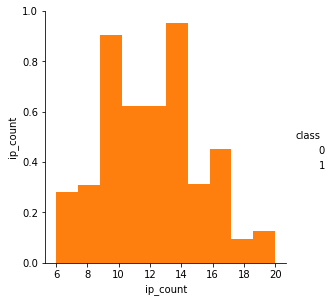

In [48]:
g = sns.PairGrid(Fraud_Data[["class","ip_count"]][Fraud_Data.ip_count >5], hue="class",height=4)
g = g.map_diag(plt.hist)
g = g.add_legend()

## Data Matrice de confusion <a class="anchor" id="1d"></a>
[return to contents](#0)

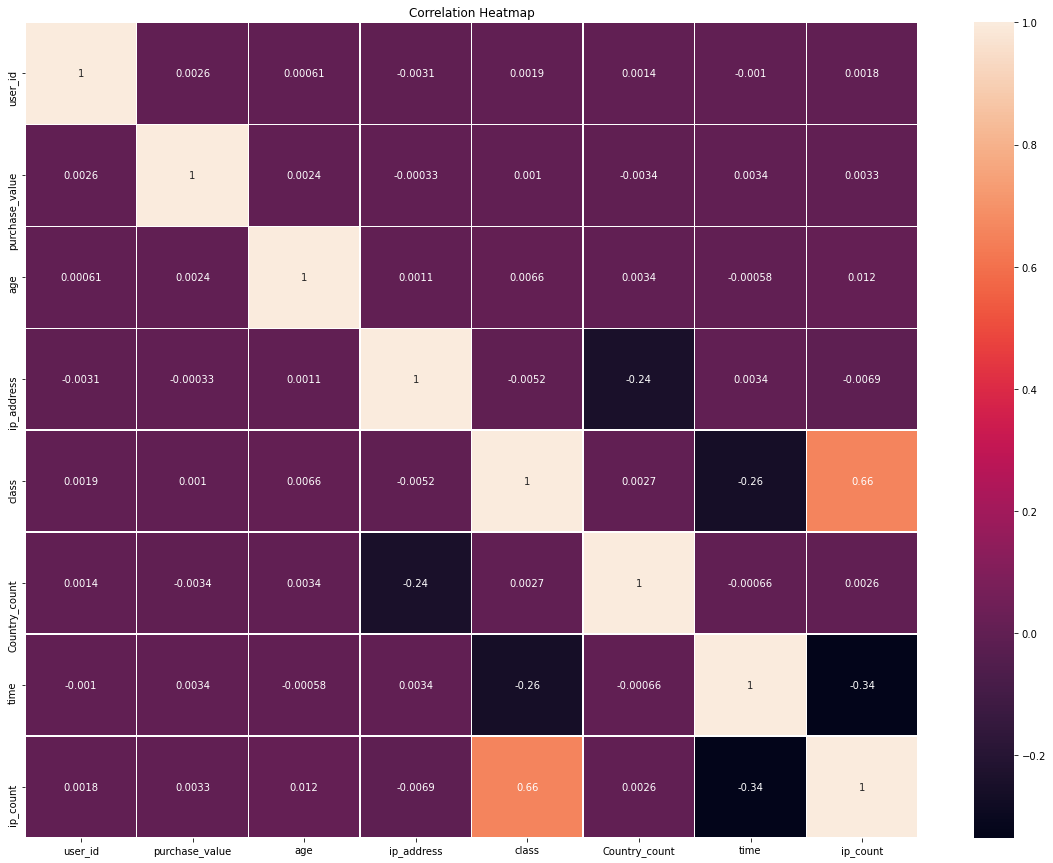

In [49]:
# heatmap on affiche uniquement les variables qui ont une corrélation d'au moins 50% avec un autre variable
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr =Fraud_Data.corr()
max_corr = [max(abs(a[a!=1])) for a in corr.values]
date4 = Fraud_Data.iloc[:,]
corr_high = date4.corr()
sns.heatmap(corr_high, 
            xticklabels=corr_high.columns.values,
            yticklabels=corr_high.columns.values,
           annot=True, linewidths=.5)

# Time to do Machine Learning <a class="anchor" id="2"></a>
[return to contents](#0)

## Logistic Regression<a class="anchor" id="2a"></a>
[return to contents](#0)

In [38]:
Fraud_Data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'time', 'Country_count', 'ip_count'],
      dtype='object')

In [39]:
Fraud_Data.isnull().any()

user_id           False
signup_time       False
purchase_time     False
purchase_value    False
device_id         False
source            False
browser           False
sex               False
age               False
ip_address        False
class             False
country           False
time              False
Country_count     False
ip_count          False
dtype: bool

In [40]:
features_list = ['purchase_value',  'source', 'browser', 'sex','age', 'time', 'ip_count','Country_count']
target_variable = "class"

X = Fraud_Data.loc[:,features_list]
Y = Fraud_Data.loc[:,target_variable]

In [41]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['purchase_value', 'age', 'time', 'ip_count', 'Country_count']  at positions  [0, 4, 5, 6, 7]
Found categorical features  ['source', 'browser', 'sex']  at positions  [1, 2, 3]


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=0, stratify=Y)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')


featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)

X_test = featureencoder.transform(X_test)


In [56]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
regressor = LogisticRegressionCV(class_weight={0:0.096,1:0.904})
regressor.fit(X_train, Y_train)

LogisticRegressionCV(Cs=10, class_weight={0: 0.096, 1: 0.904}, cv=None,
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [57]:
from sklearn.metrics import accuracy_score
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.9518318457427888
Accuracy on test set :  0.9532144393342818


In [58]:
from sklearn.metrics import f1_score
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.6758697467297522
f1-score on test set :  0.6882716049382716


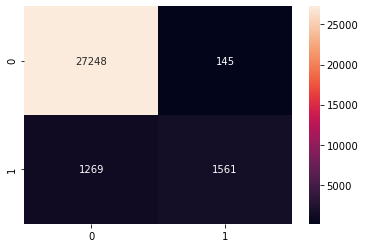

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [60]:
# import the metric
from sklearn.metrics import classification_report

# print classification report
print("Classification Report:\n\n", classification_report(Y_test, Y_test_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.97     27393
           1       0.92      0.55      0.69      2830

    accuracy                           0.95     30223
   macro avg       0.94      0.77      0.83     30223
weighted avg       0.95      0.95      0.95     30223



## Logreg + Gridsearch <a class="anchor" id="2b"></a>
[return to contents](#0)

In [61]:
from sklearn.model_selection import GridSearchCV

C1=np.logspace(0, 4, 10)
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['lbfgs','newton-cg','liblinear','sag','saga']
max_iter = [100, 1000,2500, 5000]
param_grid = dict(C=C1, penalty=penalty,solver=solver, max_iter = max_iter)

logreg=LogisticRegression(class_weight={0:0.096,1:0.904})
classifier=GridSearchCV(logreg,param_grid,cv=2)
classifier.fit(X_train, Y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0,
                                          class_weight={0: 0.096, 1: 0.904},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.000....78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'pe

In [62]:
print("tuned hpyerparameters :(best parameters) ",classifier.best_params_)
print("accuracy :",classifier.best_score_)
#tuned hpyerparameters :(best parameters)  {'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
#accuracy : 0.9517822144585687

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.9517822144585687


Accuracy on training set :  0.9517822134354655
Accuracy on test set :  0.9532144393342818
f1-score on train set :  0.6756440932613657
f1-score on test set :  0.6884089907448215


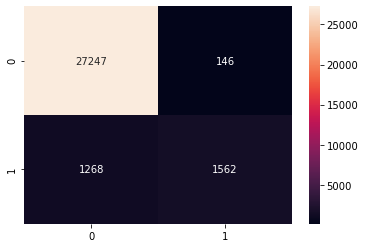

In [63]:
Y_train_pred1 = classifier.predict(X_train)
Y_test_pred1 = classifier.predict(X_test)
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred1))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred1))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred1))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred1))
cm = confusion_matrix(Y_test, Y_test_pred1)
sns.heatmap(cm, annot=True, fmt="d")

## Random Forest <a class="anchor" id="2c"></a>
[return to contents](#0)

Accuracy on training set :  0.9999007353853535
Accuracy on test set :  0.9575157992257552
f1-score on train set :  0.9994697304463102
f1-score on test set :  0.7076502732240436


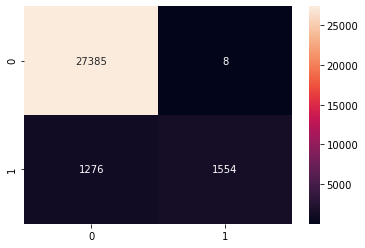

In [64]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the Random Forest classifier
RandomF1 = RandomForestClassifier(criterion="gini",class_weight={0:0.096,1:0.904})

# fit the classifier to the imbalanced data
clf1 = RandomF1.fit(X_train, Y_train)


Y_train_pred2 = clf1.predict(X_train)
Y_test_pred2 = clf1.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred2))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred2))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred2))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred2))
cm = confusion_matrix(Y_test, Y_test_pred2)
sns.heatmap(cm, annot=True, fmt="d")

Accuracy on training set :  0.9998759192316918
Accuracy on test set :  0.9575488866095357
f1-score on train set :  0.999337075175675
f1-score on test set :  0.7079444570908263


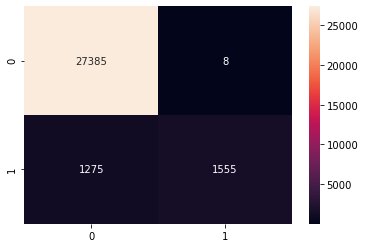

In [65]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the Random Forest classifier
RandomF2 = RandomForestClassifier(criterion="entropy",class_weight={0:0.096,1:0.904})

# fit the classifier to the imbalanced data
clf2 = RandomF2.fit(X_train, Y_train)


Y_train_pred3 = clf2.predict(X_train)
Y_test_pred3 = clf2.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred3))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred3))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred3))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred3))
cm = confusion_matrix(Y_test, Y_test_pred3)
sns.heatmap(cm, annot=True, fmt="d")

### Comparaison method between gini and entropy

In [66]:
count = 0
for i in range(0, len(Y_test_pred2)):
  
  if Y_test_pred2[i] != Y_test_pred3[i]:
    count+= 1
    

print("On the test set, there are {}  differently classified items".format(count))
print("Either {}%  difference".format(np.round(count/len(Y_test_pred3), 3)*100))

On the test set, there are 7  differently classified items
Either 0.0%  difference


## Random Forest + GridsearchCV <a class="anchor" id="2d"></a>
[return to contents](#0)

In [67]:
param = {"n_estimators": np.arange(10,50),
        "max_depth": np.arange(1,10),
       "min_samples_split":np.arange(2,10)}

In [68]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_jobs = -1,criterion="gini",class_weight={0:0.096,1:0.904})
grid1 = GridSearchCV(n_jobs = -1, estimator = rf, param_grid=param)

# CAREFUL TIME TO RUN THE BELOW IS VERY VERY LONG 
grid1.fit(X_train,Y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.096, 1: 0.904},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=...
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8

In [69]:
print("tuned hpyerparameters :(best parameters) ",grid1.best_params_)
print("accuracy :",grid1.best_score_)
#tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 17}
#accuracy : 0.9563401172727455

tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 17}
accuracy : 0.9563401172727455


Accuracy on training set :  0.9565551869897179
Accuracy on test set :  0.9575819739933163
f1-score on train set :  0.69816091954023
f1-score on test set :  0.7079726651480639


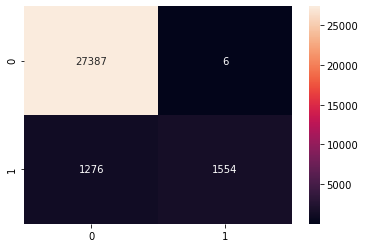

In [70]:
Y_train_pred3 = grid1.predict(X_train)
Y_test_pred3 = grid1.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred3))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred3))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred3))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred3))
cm = confusion_matrix(Y_test, Y_test_pred3)
sns.heatmap(cm, annot=True, fmt="d")

#f1-score on train set :  0.6973901098901097
#f1-score on test set :  0.703662597114317

# Addaboost and XGboost <a class="anchor" id="2e"></a>
[return to contents](#0)

In [71]:
Fraud_Data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'Country_count', 'time', 'ip_count'],
      dtype='object')

In [72]:
from sklearn.ensemble import AdaBoostRegressor 
regressor_ada = AdaBoostRegressor()
regressor_ada.fit(X_train, Y_train)
regressor_ada.score(X_test, Y_test)

0.5244463733448855

In [73]:
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, Y_train)
regressor_xgb.score(X_test, Y_test)


[10:59:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.5242106623901772

In [74]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

rtc = XGBClassifier(n_jobs = -1, random_state =42)
params = {'max_depth' : np.arange(1,6),
          "learning_rate" : np.arange(0.1,0.5,0.05),
          "n_estimators" : np.arange(10,100,10)}

grid =  GridSearchCV(estimator=rtc,       # On indique le type d'estimator que l'on veut tester
                     param_grid= params,  # On indique le dictionnaire des parametres a faire varier (cf ci-dessus)
                     cv = 10,             # Le nombre de sous echantillon sur lequel le modele va tourner
                    n_jobs =-1)      

# CAREFUL TIME TO RUN THE BELOW IS VERY LONG
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                         'max_depth': array([1, 2, 3, 4, 5]),
               

In [75]:
print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)
#tuned hpyerparameters :(best parameters)  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}
#accuracy : 0.9563566492480572

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}
accuracy : 0.9563566492480572


In [76]:
Y_train_pred4 = grid.predict(X_train)
Y_test_pred4 = grid.predict(X_test)


Accuracy on training set :  0.9563649298116454
Accuracy on test set :  0.9577804982959998
f1-score on train set :  0.6962630275810444
f1-score on test set :  0.7089416058394161


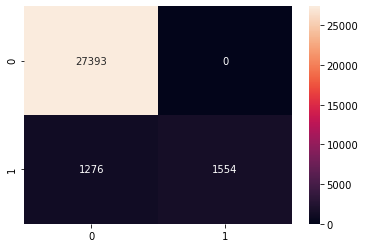

In [77]:
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred4))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred4))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred4))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred4))
cm = confusion_matrix(Y_test, Y_test_pred4)
sns.heatmap(cm, annot=True, fmt="d")

#f1-score on train set :  0.6962321232123212
#f1-score on test set :  0.7039400665926749

In [83]:
print(grid.best_estimator_.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# Staking and Voting <a class="anchor" id="3"></a>
[return to contents](#0)

## Voting <a class="anchor" id="3a"></a>
[return to contents](#0)

In [78]:
from sklearn.ensemble import VotingClassifier
vot = VotingClassifier(
    estimators = [("logreg", LogisticRegressionCV(class_weight={0:0.096,1:0.904})), 
                  ("logreg_gridsearch", LogisticRegression(class_weight={0:0.096,1:0.904},
                                                C= 1.0, max_iter= 100, penalty='l1', solver='liblinear')), 
                  ("RandomF_gini", RandomForestClassifier(n_jobs=-1,criterion="gini",class_weight={0:0.096,1:0.904})),
                  ("RandomF_entropy", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904})),
                  ("RandomF_gridsearch", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904},
                                                               max_depth= 9, min_samples_split= 4, n_estimators= 17)),
                  ("XGBClf_gridsearch", XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10))]
)

In [79]:
vot.fit(X_train, Y_train) 
vot.score(X_test, Y_test)

0.9577474109122192

In [80]:
Y_train_pred_vot = vot.predict(X_train)
Y_test_pred_vot = vot.predict(X_test)


Accuracy on training set :  0.9565717310921589
Accuracy on test set :  0.9577474109122192
f1-score on train set :  0.6981370745170193
f1-score on test set :  0.7086470454026922


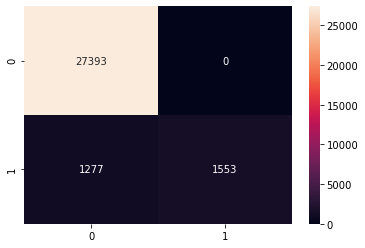

In [81]:
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred_vot))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred_vot))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred_vot))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred_vot))
cm = confusion_matrix(Y_test, Y_test_pred_vot)
sns.heatmap(cm, annot=True, fmt="d")

## Staking <a class="anchor" id="3b"></a>
[return to contents](#0)

In [82]:
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(
    estimators = [("logreg", LogisticRegressionCV(class_weight={0:0.096,1:0.904})), 
                  ("logreg_gridsearch", LogisticRegression(class_weight={0:0.096,1:0.904},
                                                C= 1.0, max_iter= 100, penalty='l1', solver='liblinear')), 
                  ("RandomF_gini", RandomForestClassifier(n_jobs=-1,criterion="gini",class_weight={0:0.096,1:0.904})),
                  ("RandomF_entropy", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904})),
                  ("RandomF_gridsearch", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904},
                                                               max_depth= 9, min_samples_split= 4, n_estimators= 17)),
                  ("XGBClf_gridsearch", XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10)),
                  ("Voting", VotingClassifier(
    estimators = [("logreg", LogisticRegressionCV(class_weight={0:0.096,1:0.904})), 
                  ("logreg_gridsearch", LogisticRegression(class_weight={0:0.096,1:0.904},
                                                C= 1.0, max_iter= 100, penalty='l1', solver='liblinear')), 
                  ("RandomF_gini", RandomForestClassifier(n_jobs=-1,criterion="gini",class_weight={0:0.096,1:0.904})),
                  ("RandomF_entropy", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904})),
                  ("RandomF_gridsearch", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904},
                                                               max_depth= 9, min_samples_split= 4, n_estimators= 17)),
                  ("XGBClf_gridsearch", XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10))]
))],
    final_estimator=RandomForestClassifier()
)

In [83]:
stack.fit(X_train, Y_train)
stack.score(X_test, Y_test)

0.9577474109122192

In [84]:
Y_train_pred_stack = stack.predict(X_train)
Y_test_pred_stack = stack.predict(X_test)

Accuracy on training set :  0.9566875398092465
Accuracy on test set :  0.9577474109122192
f1-score on train set :  0.6992533026995978
f1-score on test set :  0.7086470454026922


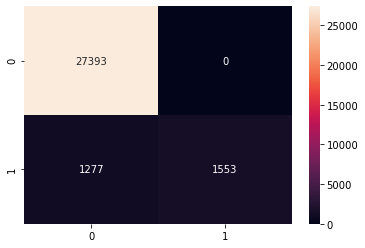

In [85]:
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred_stack))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred_stack))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred_stack))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred_stack))
cm = confusion_matrix(Y_test, Y_test_pred_stack)
sns.heatmap(cm, annot=True, fmt="d")

# Bonus : PCA SMOTETomek <a class="anchor" id="4"></a>
[return to contents](#0)

Resampling technique named SMOTETomek, which combines undersampling and oversampling. SMOTETomek is a good way to avoid the disadvantages of the SMOTE and the Tomek Link technique. The SMOTETomek technique is applied using the library from imbalanced_learn, and included an SMOTE function for oversampling as well as a Tomek Link function for undersampling. The algorithm flow of the SMOTETomek method is to combine SMOTE and Tomek Link to form a pipeline. The standard flow is as follows:

Step 1: For a dataset D with an unbalanced data distribution, it uses the SMOTE method to obtain an extended dataset D’ by generating many new minority samples.

Step2: Tomek Link pairs in dataset D’ are removed using the Tomek Link method.

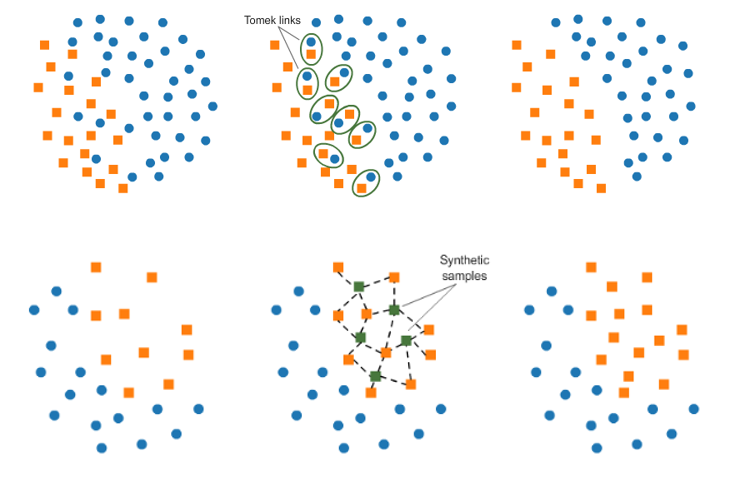

In [86]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from collections import Counter

Using TensorFlow backend.


In [87]:
print('Original dataset shape {}'.format(Counter(Y_train)))

Original dataset shape Counter({0: 109568, 1: 11321})


In [88]:
Fraud_Data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'Country_count', 'time', 'ip_count'],
      dtype='object')

In [89]:
features_list = [ 'age','purchase_value', 'ip_count','time']
target_variable = "class"

X1 = Fraud_Data.loc[:,features_list]
Y1 = Fraud_Data.loc[:,target_variable]

In [90]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X1.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'purchase_value', 'ip_count', 'time']  at positions  [0, 1, 2, 3]
Found categorical features  []  at positions  []


In [91]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.33, 
                                                    random_state=0, stratify=Y)

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')


featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train1 = featureencoder.fit_transform(X_train1)

X_test1 = featureencoder.transform(X_test1)

In [93]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)

# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_train1)


# Apply the random under-sampling
tl = SMOTETomek(sampling_strategy='not minority')
X_resampled, Y_resampled = tl.fit_sample(X_train1, Y_train1)
X_res_vis = pca.transform(X_resampled)

print('Resampled dataset shape %s' % Counter(Y_resampled))


Resampled dataset shape Counter({0: 89035, 1: 6752})


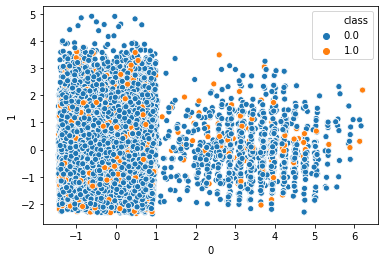

In [94]:
XX= pd.DataFrame(X_vis)
YY= pd.DataFrame(X_res_vis)

sns.scatterplot(x=XX.loc[:,0], y=XX.loc[:,1],hue = Y_train1 )


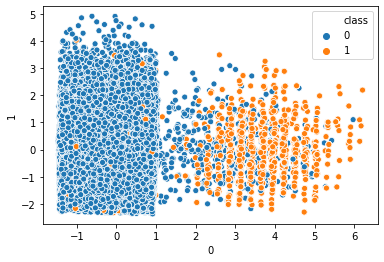

In [95]:
sns.scatterplot(x=YY.loc[:,0], y=YY.loc[:,1],hue = Y_resampled )

In [96]:
XGB =  XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10)
reg1 = XGB.fit(X_resampled, Y_resampled)

Y_train_pred1 = reg1.predict(X_resampled)
Y_test_pred1 = reg1.predict(X_test1)

print("Accuracy on training set : ", accuracy_score(Y_resampled, Y_train_pred1))
print("Accuracy on test set : ", accuracy_score(Y_test1, Y_test_pred1))

# print classification report
print("Classification Report:\n\n", classification_report(Y_test1, Y_test_pred1))

Accuracy on training set :  0.9823671270631714
Accuracy on test set :  0.9572061684079652
Classification Report:

               precision    recall  f1-score   support

           0       0.95      1.00      0.98     45197
           1       1.00      0.54      0.70      4670

    accuracy                           0.96     49867
   macro avg       0.98      0.77      0.84     49867
weighted avg       0.96      0.96      0.95     49867



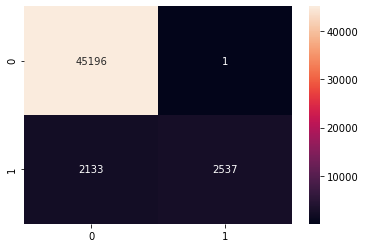

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test1, Y_test_pred1)
sns.heatmap(cm, annot=True, fmt="d")

# Evaluation report<a class="anchor" id="5"></a>
[return to contents](#0)

In [45]:
from sklearn import model_selection

# prepare models
models = []
models.append(("logreg", LogisticRegressionCV(class_weight={0:0.096,1:0.904})))
models.append(("logreg_gridsearch", LogisticRegression(class_weight={0:0.096,1:0.904},
                                                C= 1.0, max_iter= 100, penalty='l1', solver='liblinear')))
models.append(("RandomF_gini", RandomForestClassifier(n_jobs=-1,criterion="gini",class_weight={0:0.096,1:0.904})))
models.append(("RandomF_entropy", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904})))
models.append(("RandomF_gridsearch", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904},
                                                               max_depth= 9, min_samples_split= 4, n_estimators= 17)))
models.append(("XGBClf_gridsearch", XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10)))
models.append(("Voting",VotingClassifier(
    estimators = [("logreg", LogisticRegressionCV(class_weight={0:0.096,1:0.904})), 
                  ("logreg_gridsearch", LogisticRegression(class_weight={0:0.096,1:0.904},
                                                C= 1.0, max_iter= 100, penalty='l1', solver='liblinear')), 
                  ("RandomF_gini", RandomForestClassifier(n_jobs=-1,criterion="gini",class_weight={0:0.096,1:0.904})),
                  ("RandomF_entropy", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904})),
                  ("RandomF_gridsearch", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904},
                                                               max_depth= 9, min_samples_split= 4, n_estimators= 17)),
                  ("XGBClf_gridsearch", XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10))])))


logreg: 0.675726 (0.012196)
logreg_gridsearch: 0.675461 (0.012403)
RandomF_gini: 0.695211 (0.012969)
RandomF_entropy: 0.694931 (0.013234)
RandomF_gridsearch: 0.695789 (0.013499)
XGBClf_gridsearch: 0.696027 (0.013438)
Voting: 0.696027 (0.013438)


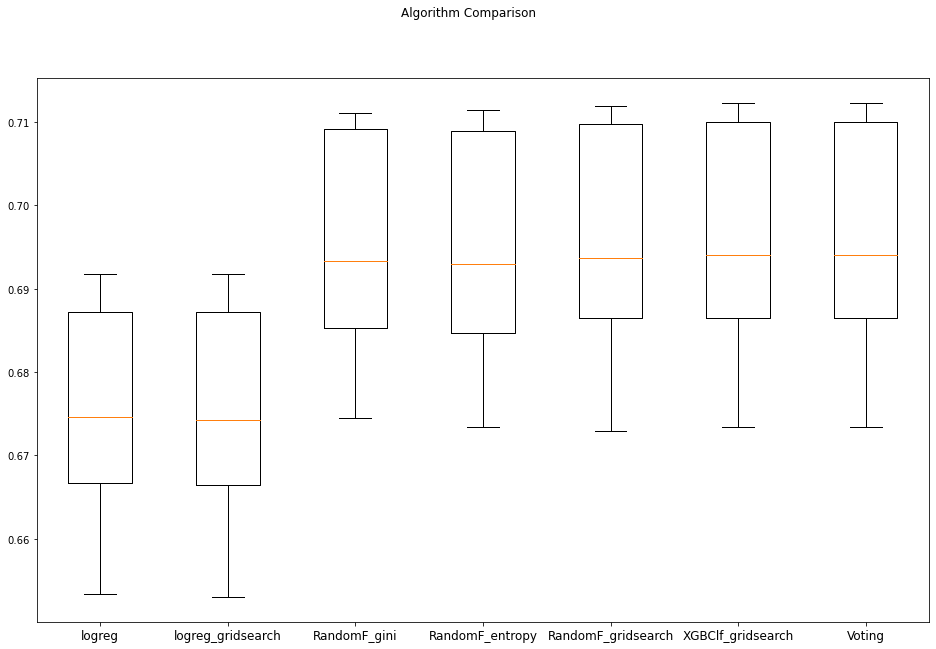

In [99]:
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(16,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, fontsize='12')
plt.show()

logreg: 0.688210 (0.020330)
logreg_gridsearch: 0.688011 (0.020398)
RandomF_gini: 0.708215 (0.018638)
RandomF_entropy: 0.707771 (0.018785)
RandomF_gridsearch: 0.708202 (0.018718)
XGBClf_gridsearch: 0.708532 (0.018674)
Voting: 0.708532 (0.018674)


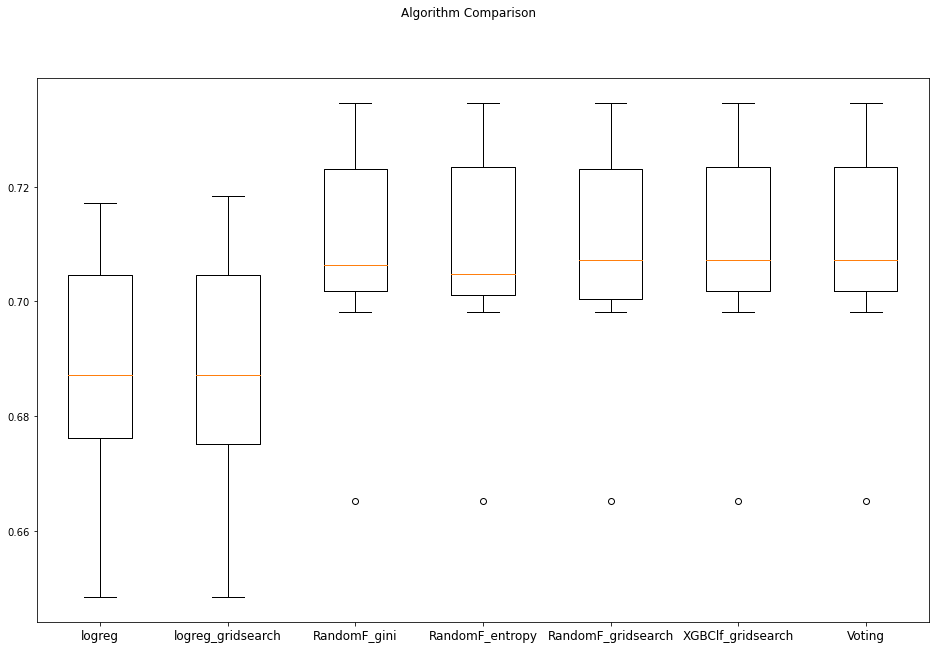

In [100]:
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(16,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, fontsize='12')
plt.show()

In [46]:
# evaluate each model in turn
results = []
names = []
testf1= []
scoring = 'f1'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        testf1.append(cv_results.mean())

In [47]:
# evaluate each model in turn
results = []
names = []
trainf1= []
scoring = 'f1'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        trainf1.append(cv_results.mean())

In [48]:
# evaluate each model in turn
results = []
names = []
testaccur= []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        testaccur.append(cv_results.mean())

In [49]:
# evaluate each model in turn
results = []
names = []
trainaccur= []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        trainaccur.append(cv_results.mean())

In [50]:
# evaluate each model in turn
results = []
names = []
testrecall= []
scoring = 'recall'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        testrecall.append(cv_results.mean())

In [51]:
# evaluate each model in turn
results = []
names = []
trainrecall= []
scoring = 'recall'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        trainrecall.append(cv_results.mean())

In [52]:
Score=[]
Score=pd.DataFrame(Score)

In [53]:
Score['Models']= names
Score['F1_test']=np.round(testf1,5)
Score['F1_train']=np.round(trainf1,5)
Score['Accur_test']=np.round(testaccur,4)
Score['Accur_train']=np.round(trainaccur,4)
Score['Recall_test']=np.round(testrecall,4)
Score['Recall_train']=np.round(trainrecall,4)

In [54]:
Score.sort_values('F1_test',ascending=False)

,Models,F1_test,F1_train,Accur_test,Accur_train,Recall_test,Recall_train
5,XGBClf_gridsearch,0.70853,0.69603,0.9577,0.9564,0.5491,0.5340
6,Voting,0.70825,0.69603,0.9577,0.9564,0.5491,0.5340
3,RandomF_entropy,0.70815,0.69522,0.9576,0.9561,0.5491,0.5344
2,RandomF_gini,0.70804,0.69506,0.9577,0.9561,0.5495,0.5342
4,RandomF_gridsearch,0.70793,0.69582,0.9577,0.9563,0.5491,0.5340
0,logreg,0.68821,0.67573,0.9533,0.9518,0.5516,0.5362
1,logreg_gridsearch,0.68801,0.67546,0.9532,0.9518,0.5519,0.5362


In [110]:
Fraud_Data['fraud_purchase'] = Fraud_Data['purchase_value']*Fraud_Data['class']
print(np.round(Fraud_Data['fraud_purchase'][Fraud_Data['fraud_purchase']>0].mean(),2))
print(np.round(Fraud_Data['purchase_value'][Fraud_Data['class']==0].mean(),2))

36.99
36.93
